<a href="https://colab.research.google.com/github/blackcrowX/Data_Analytics_Portfolio/blob/main/Project_III/Pokemon_Gen_1-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
<h1>Pokemon Generation 1-8</h1>
<img src="https://static.wikia.nocookie.net/logo-timeline/images/2/21/Pok%C3%A9mon_%28Print%29.svg/revision/latest?cb=20181024043055"/>
<p align="center"><em>Image taken from: https://logo-timeline.fandom.com/wiki/Pok%C3%A9mon/Other</em></p>
</div>


## Table of Contents
* Introduction
* Dataset
* Setup
  * Import Libraries
  * Import Data
* Data Cleaning
  * Review Dataframe
  * Review Info
  * Review Missing Values
  * Organise Columns
  * Review Columns
* Data Analysis
  * Primary and Secondary Type Frequency
  * Strongest and Weakest Pokemon
* Data Visualisation
  * Generational Distribution
  * Strongest Generation
  * Distribution Single Types
  * Strongest Single Type without Legendaries
  * Distribution Dual Types
  * Strongest Dual Types by Median
  * Total Stat and Type Ratio
  * Columns Correlation
*  Conclusion

<h1 align="center">Introduction</h1>

This data analysis case study will be on a dataset regarding pokemon. It contains data manipulations to try and find answers to questions using visuals of data and statistics. 

Considering how diverse Pokemon are, I was interested in analyzing this datset to learn how the game is balanced and to potentially identify the best Pokemon, if there exists one.



<h1 align="center">Dataset</h1>

The dataset is a listing of all 898 Pokemon species, 1072 including alternate forms, as of 2021. It contains data about their number, name, first and second type, basic statistics, total statistics,  generation, and legendary status. The dataset was published by <a href="https://data.world/data-society/pokemon-with-stats">data.world</a>.

<h1 align="center">Setup</h1>

## Step 1: Import Libraries

Import and configure libraries required for data analysis.

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "darkgrid")
sns.set_context('notebook', font_scale=1.4)

## Step 2: Import Dataset
Import dataset using Pandas as `df` into Python.

In [2]:
url = "https://raw.githubusercontent.com/blackcrowX/Data_Analytics_Projects/main/Datasets/pokemon_gen_1-8.csv"
df = pd.read_csv(url)

<h1 align="center">Data Cleaning</h1>

## Step 3: Review Dataframe

First we'll read the first and last five rows of the dataframe to get a brief overview of the data

In [3]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [4]:
df.tail()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True
1071,898,Shadow Rider Calyrex,Psychic,Ghost,680,100,85,80,165,100,150,8,True


After overviewing the dataframe we can say that there appear to be some missing values (`NaN`) and entries have a unique name instead of a unique number value. 

## Step 4: Review Info
Let's check the info of the dataframe for the `dtype` of each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


The basic insight here is that the dataframe has 13 columns of which nine are of type integer, three are of type object and one is of type boolean. The amount of rows matches the amount of pokemon species including alternate forms. The column types match their respective value.

## Step 5: Review Missing Values
Check for `Null` or `NaN` values to avoid errors and potential bias later on.


In [6]:
df.isnull().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

Since all Pokemon species have a primary type but not necessarily a secondary type, we'll fill in these missing values with a placeholder.

In [7]:
df["type2"].fillna(value="None", inplace=True)

With all the missing values filled and no further missing values in the dataframe we can check on the columns.

## Step 6: Organize Columns

Let's first rename columns `type1` into `primary_type` and `type2` into `secondary_type`.

In [8]:
df.rename(columns = {"type1":"primary_type", "type2":"secondary_type"}, inplace = True)

Let's check if the columns in the dataframe have been correctly renamed.

In [9]:
df.columns

Index(['number', 'name', 'primary_type', 'secondary_type', 'total', 'hp',
       'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation',
       'legendary'],
      dtype='object')

Now we have renamed the columns `type1` and `type2`.

## Step 7: Review Columns

Let's review the columns of the dataframe to check for incorrect values in the dataframe.

In [10]:
print("Pokemon Names:", len(df["name"].unique()))
print("Pokedex Numbers:", len(df["number"].unique()))
print("Primary Types:", len(df["primary_type"].unique()))
print("Secondary Types:", len(df["secondary_type"].unique()))
print("Generations:", len(df["generation"].unique()))

Pokemon Names: 1072
Pokedex Numbers: 898
Primary Types: 20
Secondary Types: 19
Generations: 9


In [11]:
print("Total Stats:", min(df["total"].unique()), "-", max(df["total"]))
print("HP Stats:", min(df["hp"].unique()), "-", max(df["hp"]))
print("Attack Stats:", min(df["attack"].unique()), "-", max(df["attack"]))
print("Defense Stats:", min(df["defense"].unique()), "-", max(df["defense"]))
print("Special Attack Stats:", min(df["sp_attack"].unique()), "-", max(df["sp_attack"]))
print("Special Defense Stats:", min(df["sp_defense"].unique()), "-", max(df["sp_defense"]))
print("Speed Stats:", min(df["speed"].unique()), "-", max(df["speed"]))

Total Stats: 175 - 1125
HP Stats: 1 - 255
Attack Stats: 5 - 190
Defense Stats: 5 - 250
Special Attack Stats: 10 - 194
Special Defense Stats: 20 - 250
Speed Stats: 5 - 200


The unique length of the columns `name`, `number` and `legendary` are fine. The stats also appear to have a sensible range. But we have to further look into why the amount of primary types is higher than the amount of secondary types and why we have nine different values for eight generations of Pokemon.

In [12]:
print("Primary Type:",df["primary_type"].unique())
print("Secondary Type:",df["secondary_type"].unique())
print("Generations:",df["generation"].unique())

Primary Type: ['Grass' 'Fire' 'Water' 'Blastoise' 'Bug' 'Normal' 'Dark' 'Poison'
 'Electric' 'Ground' 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock'
 'Ghost' 'Dragon' 'Flying' 'Graass']
Secondary Type: ['Poison' 'None' 'Flying' 'Dragon' 'Water' 'Normal' 'Psychic' 'Steel'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Electric' 'Ice' 'Dark' 'Ghost'
 'Rock' 'Fire' 'Bug']
Generations: [1 7 8 2 3 4 5 6 0]


Know we know that there are two incorrect value for the `primary_type` with `Blastoise` and `Graass` and one incorrect value for the `generation`  with `0`.
We will have to replace these values with the correct value.

For the incorrect value `0`:

In [13]:
df.loc[df["generation"] == 0]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
950,808,Meltan,Steel,None,300,46,65,65,55,35,34,0,True
951,809,Melmetal,Steel,None,600,135,143,143,80,65,34,0,True
952,809,Gigantamax Melmetal,Steel,None,600,135,143,143,80,65,34,0,True


In [14]:
df.generation = df.generation.replace(0, 7)

For the incorrect value `"Graass"`:

In [15]:
df.loc[df["primary_type"] == "Graass"]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
978,830,Eldegoss,Graass,None,460,60,50,90,80,120,60,8,False


In [16]:
df.primary_type = df.primary_type.str.replace("Graass", "Grass")

For the incorrect value `"Blastoise"`:

In [17]:
df.loc[df["primary_type"] == "Blastoise"]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
15,9,Gigantamax Blasoise,Blastoise,Water,530,79,83,100,85,105,78,1,False


In [18]:
df.loc[15,["primary_type","secondary_type"]] = ["Water", "None"]

Let's check if the changes have been updated correctly.

In [19]:
print("Pokemon Names:", len(df["name"].unique()))
print("Pokedex Numbers:", len(df["number"].unique()))
print("Primary Types:", len(df["primary_type"].unique()))
print("Secondary Types:", len(df["secondary_type"].unique()))
print("Generations:", len(df["generation"].unique()))
print("Legendary:", len(df["legendary"].unique()))

Pokemon Names: 1072
Pokedex Numbers: 898
Primary Types: 18
Secondary Types: 19
Generations: 8
Legendary: 2


Now we have sucessfully cleaned the dataframe and can continue with data analysis and data visualisation. We could also seperate

<h1 align="center">Data Analysis</h1>

## Step 8: Primary and Secondary Type Frequency

Now, after seeing what the unique types are let's find out what how many Pokemon have each type.

In [20]:
print(df["primary_type"].value_counts())


Water       137
Normal      117
Grass        95
Bug          83
Psychic      80
Fire         67
Electric     63
Rock         60
Dark         48
Fighting     45
Ghost        43
Poison       42
Ground       42
Dragon       41
Steel        39
Ice          38
Fairy        23
Flying        9
Name: primary_type, dtype: int64


In [21]:
print(df["secondary_type"].value_counts())

None        499
Flying      114
Fairy        44
Psychic      43
Poison       41
Ground       39
Steel        36
Dragon       35
Fighting     32
Grass        29
Dark         28
Ghost        26
Water        21
Ice          19
Fire         18
Rock         16
Normal       11
Electric     11
Bug          10
Name: secondary_type, dtype: int64


We can conclude that the highest frequency for the primary type belongs to `Water` and for the secondary type `None`. On the other hand, the lowest frequency for the primary type belongs to `Flying` and for the secondary type `Bug`.  Furthermore it appears that almost half of all pokemon only have a primary type and almost 1/10 of all Pokemon have the Flying Type.

## Step 9: Strongest and Weakest Pokemon

Let's find out which Pokemon are the strongest and which Pokemon are the weakest.

In [22]:
strongest = df.sort_values(by="total", ascending=False)
strongest.head(10)

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1057,890,Eternamax Eternatus,Poison,Dragon,1125,255,115,250,125,250,130,8,True
204,150,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
471,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
205,150,Mega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,True
467,382,Primal Kyogre,Water,None,770,100,150,90,180,160,90,3,True
469,383,Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
942,800,Ultra Necrozma,Psychic,Dragon,754,97,167,97,167,97,129,7,True
597,493,Arceus,Normal,None,720,120,120,120,120,120,120,4,True
1053,888,Zacian Crowned Sword Forme,Fairy,Steel,720,92,170,115,80,115,148,8,True
1055,889,Zamazenta Crowned Sheild Forme,Fighting,Steel,720,92,130,145,80,145,128,8,True


In [23]:
weakest = df.sort_values(by="total")
weakest.head(10)

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
883,746,Wishiwashi Solo Forme,Water,None,175,45,20,20,25,25,40,7,False
247,191,Sunkern,Grass,None,180,30,30,30,30,30,30,2,False
971,824,Blipbug,Bug,None,180,25,20,20,25,45,45,8,False
1031,872,Snom,Ice,Bug,185,30,25,35,45,30,20,8,False
367,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
491,401,Kricketot,Bug,None,194,37,25,41,25,41,25,4,False
333,265,Wurmple,Bug,None,195,45,45,35,20,30,20,3,False
20,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
16,10,Caterpie,Bug,None,195,45,30,35,20,20,45,1,False
348,280,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False


So know we know that `Eternamax Eternatus` is the strongest pokemon in the game followed by `Mega Mewtwo X`, `Mega Rayquaza` and `Mega Mewtwo Y`, and that `Wishiwashi Solo Forme` is the weakest pokemon followed by `Sunkern` and `Blipbug`. It is interesting that all the strongest pokemon are legendary while all the weakest pokemon are non-legendary.

<h1 align="center">Data Visualisation</h1>

## Step 10: Generational Distribution

Let's find out how the number of Pokemon are distributed over the generations.


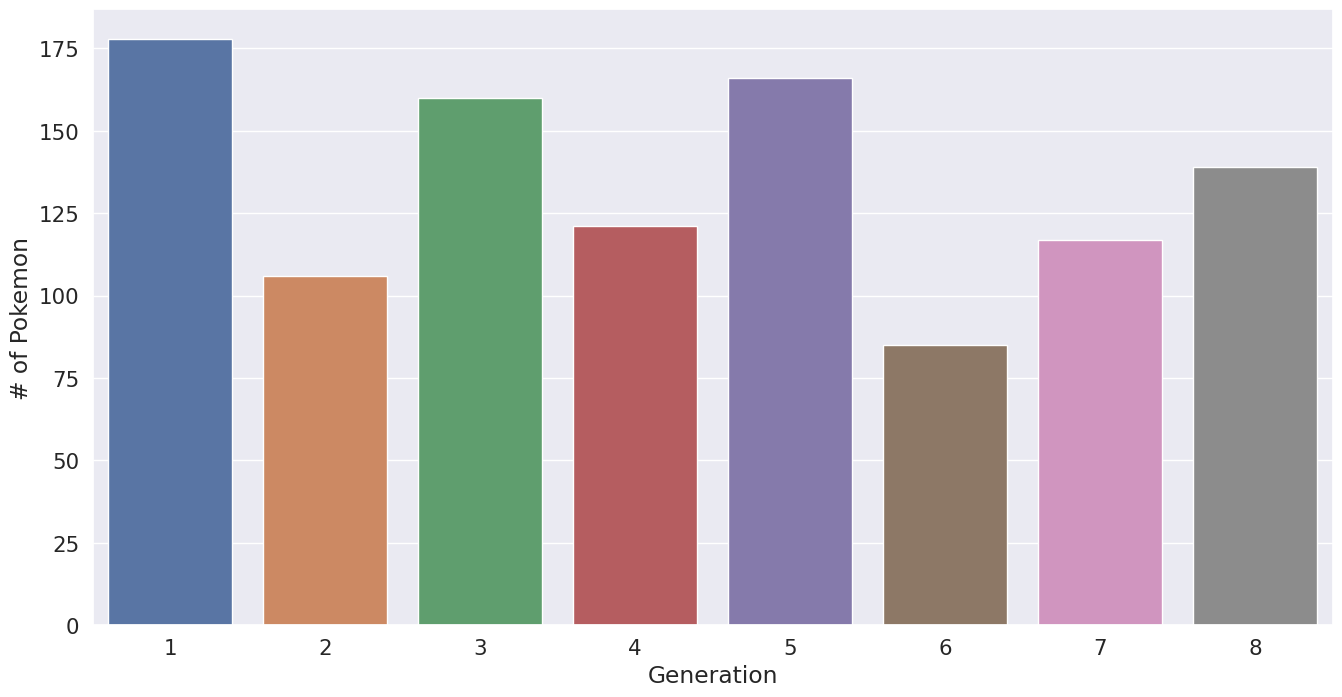

In [24]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(
          x = df["generation"],
          data= df
          ).set(xlabel ="Generation", ylabel = "# of Pokemon")

The most Pokemon come from the first generation and there doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations. 

Let's use a `catplot()` to look at the distribution for each type.

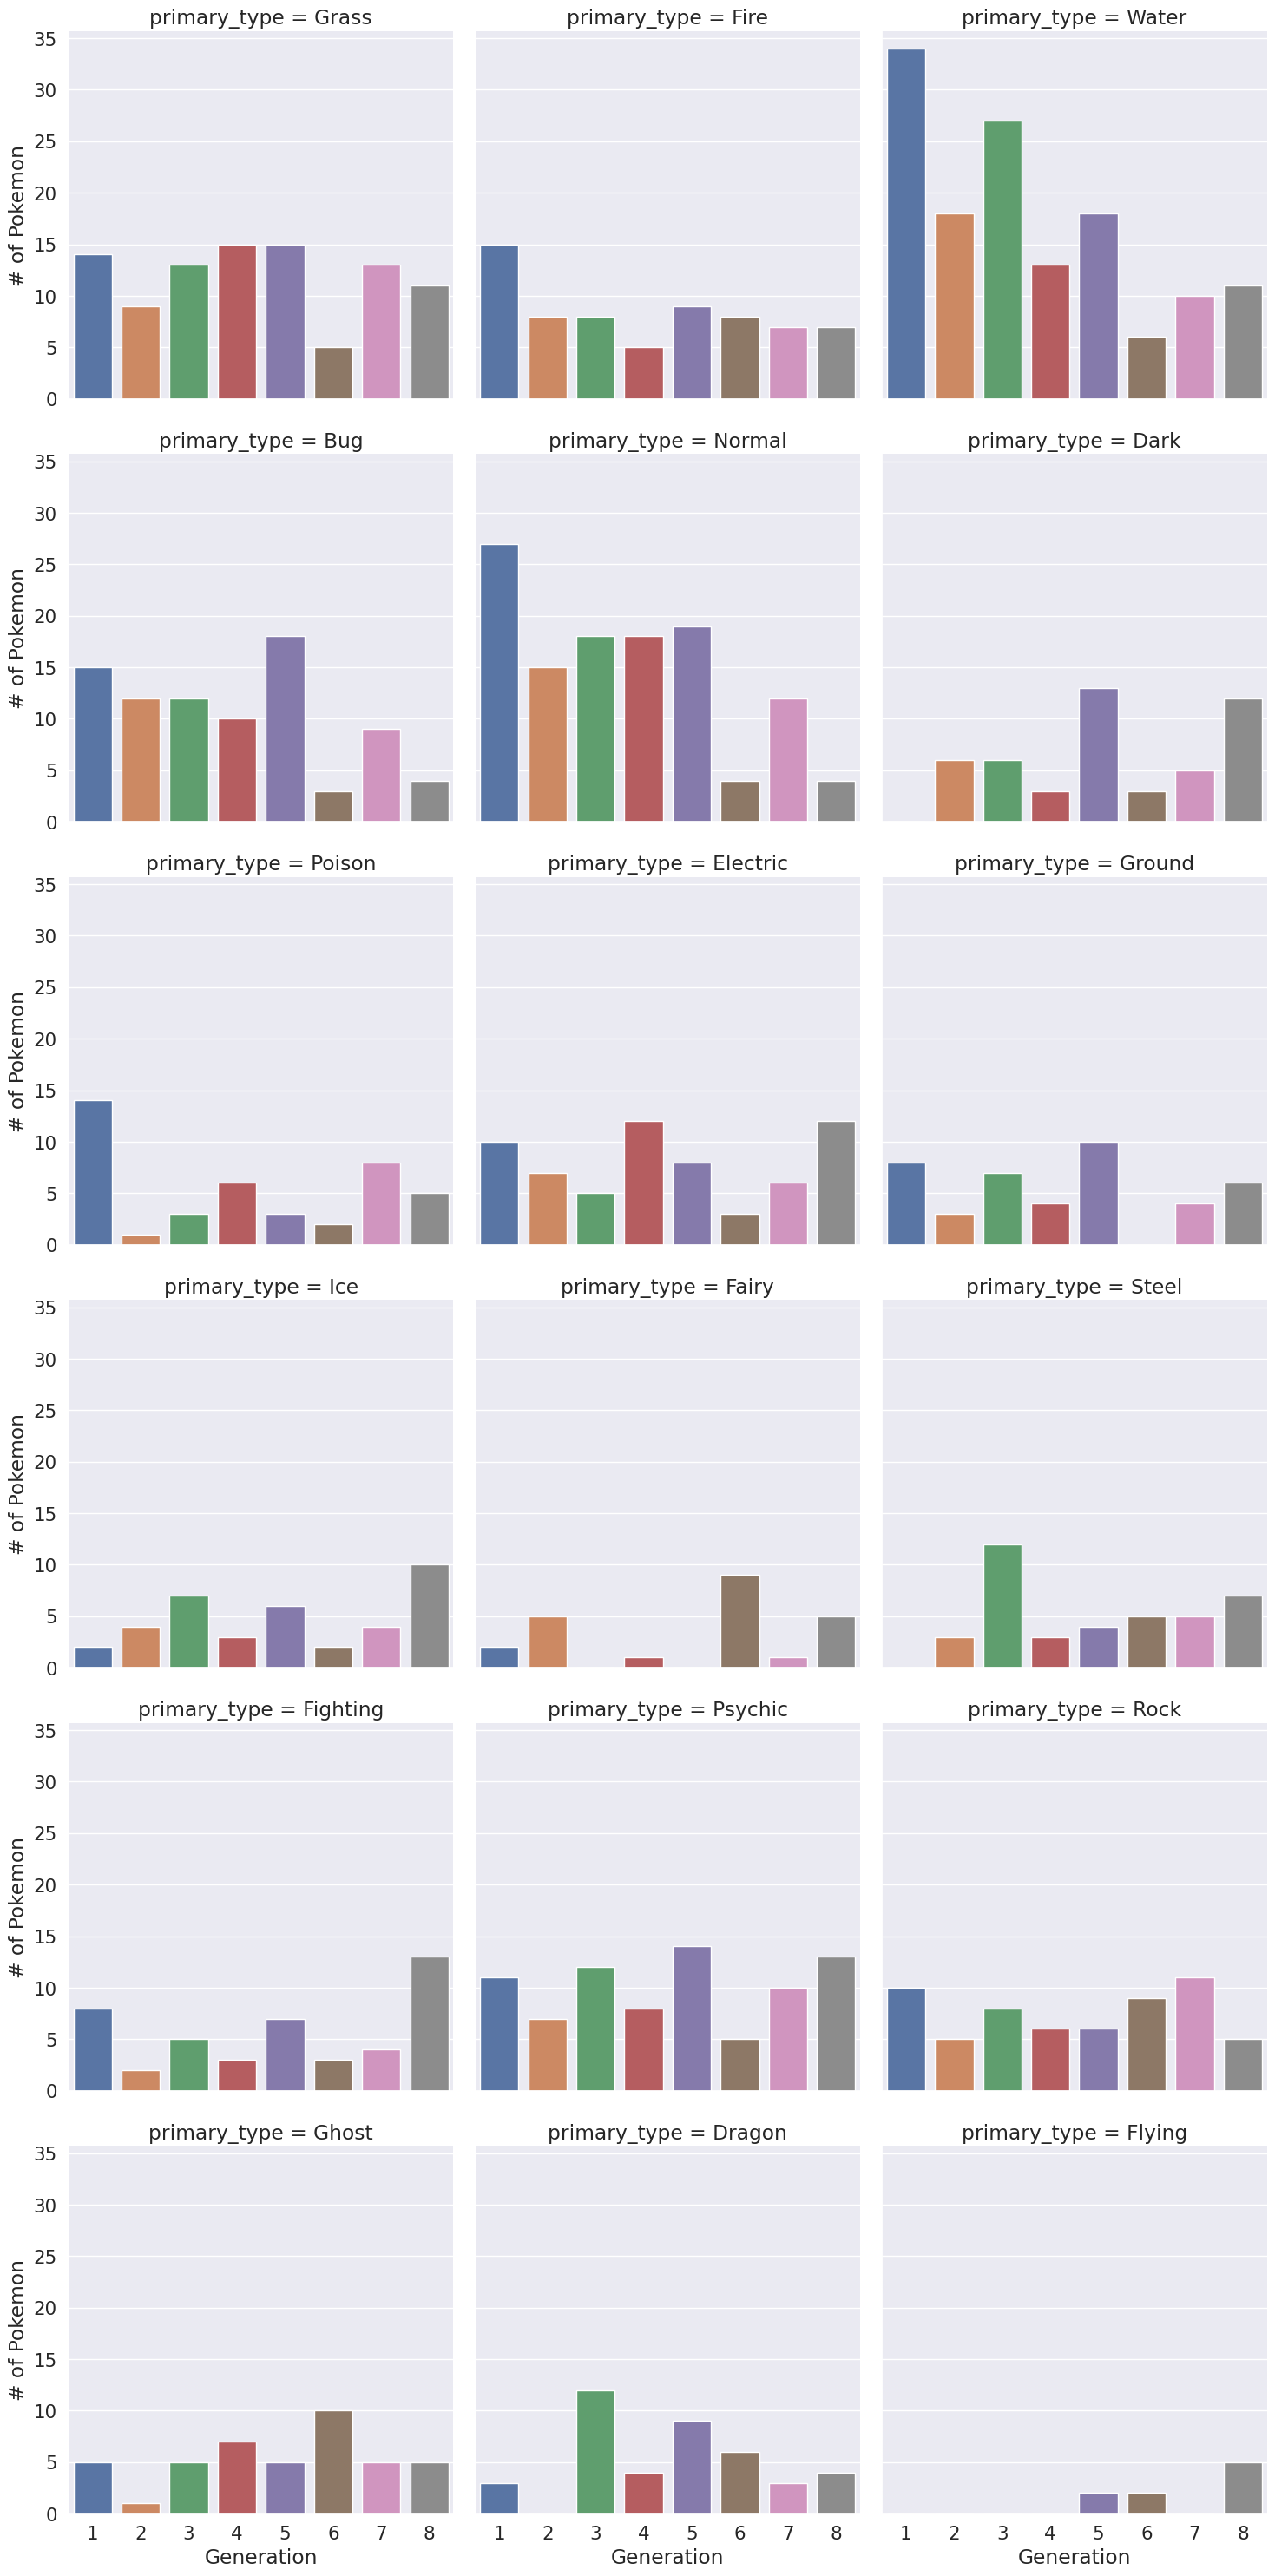

In [25]:
sns.catplot(
    x='generation',
    data=df,
    col='primary_type',
    kind='count',
    col_wrap=3
).set_axis_labels('Generation', '# of Pokemon');

We can see hat Pokemon with th pimary type flying are a more recent addition to the roster of Pokemon starting from the fifth generation. Furthermore there are no `Dark` or `Steel` type Pokemon in the first generation

## Step 11: Strongest Generation

Let's find out which generation is the strongest.

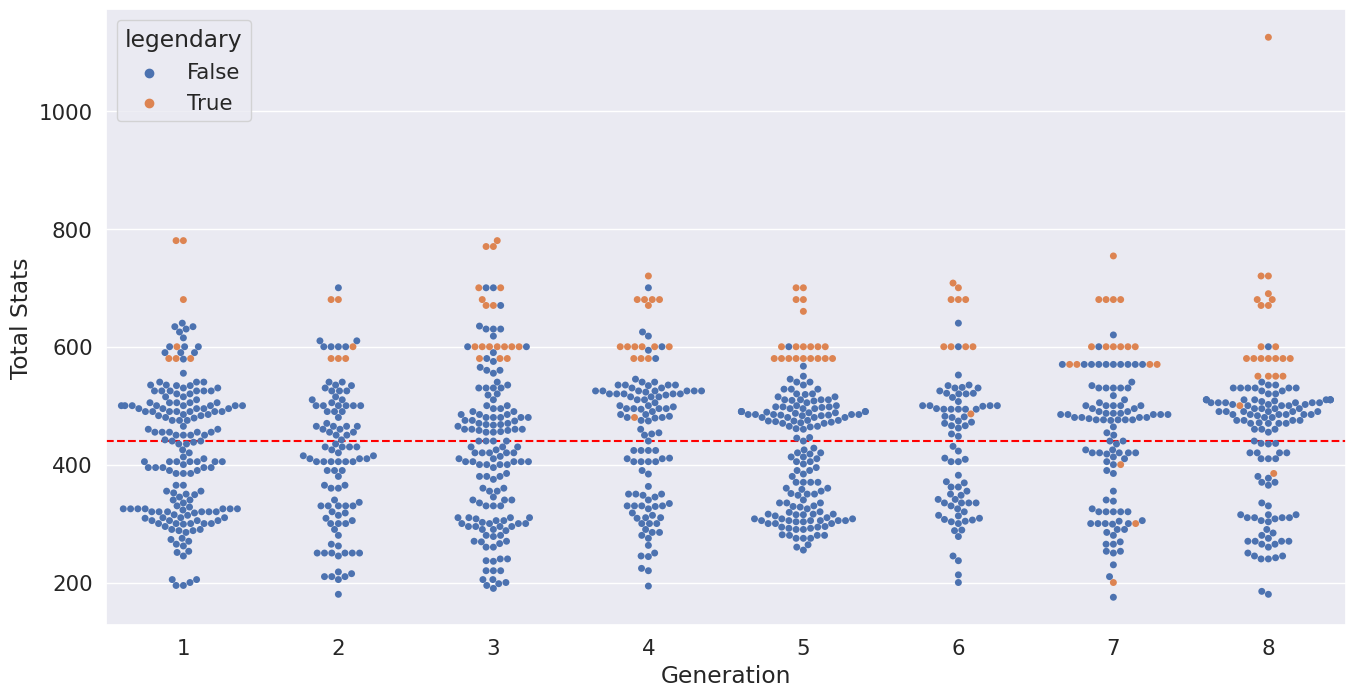

In [26]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.swarmplot(
        data = df, 
        x = "generation",
        y= "total",
        hue = "legendary"
        ).set(xlabel ="Generation", ylabel = "Total Stats")
plt.axhline(df["total"].mean(), color = "red", linestyle = "dashed");

The newest Generation appears to be the strongest, but the difference is marginally and mainly due to the outlier with the strongest pokemon. We can confirm again that the strongest pokemon are usually legendary with a few exceptions in generation 7 and 8. Here there are legendary pokemon which are under the mean of `total`.

## Step 12: Distribution Single Type Pokemon

Let's investigate the distribution of every single type Pokemon.

In [27]:
single_types = df[df["secondary_type"] == "None"]

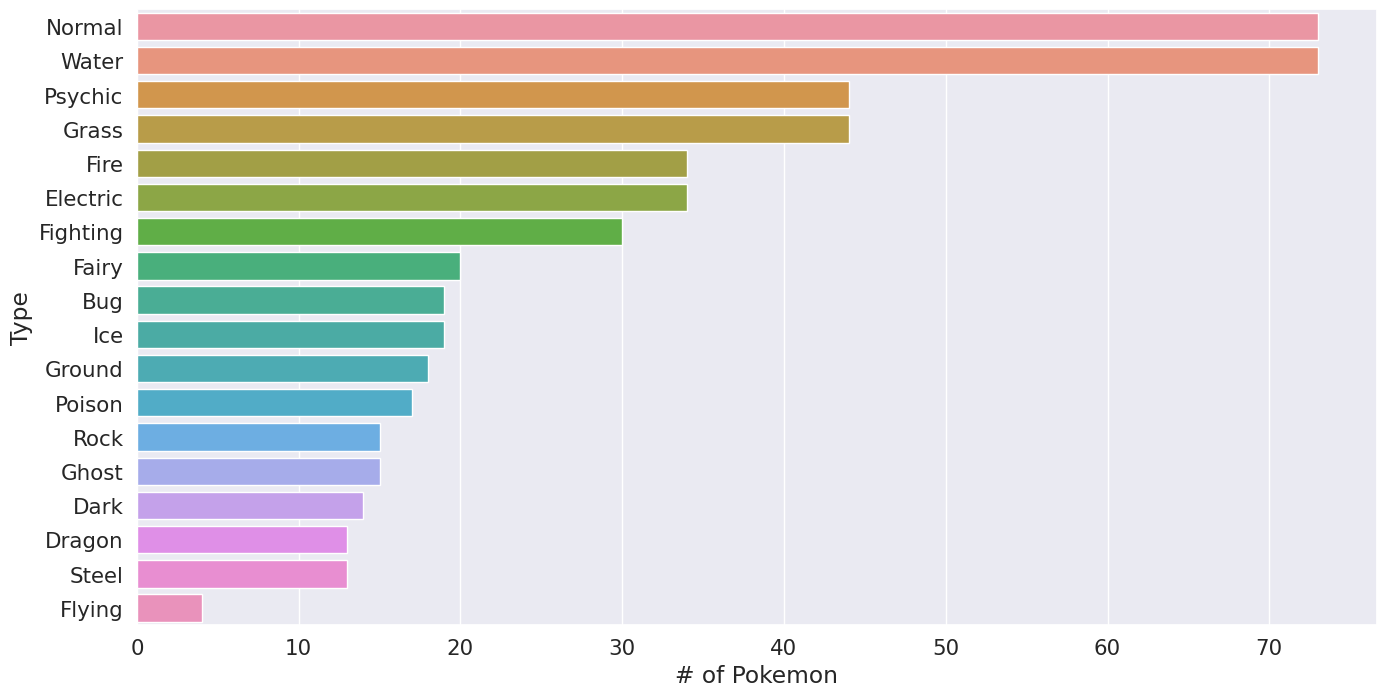

In [28]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(
        y="primary_type", 
        data=single_types,
        order=single_types["primary_type"].value_counts().index,
        ).set(xlabel ="# of Pokemon", ylabel = "Type");

This plot reveals that the most common single typed pokemon are `Water` and `Normal` type with an equal amount followed by `Psychic`and `Grass` also in an equal amount.

## Step 13: Strongest Single Type Non-Legendary Pokemon

Let's find out what the stongest single type Pokemon without legendary Pokemon are.

In [29]:
strongest_single = single_types[~single_types["legendary"]].sort_values(by="total", ascending=False)
strongest_single.head(10)

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
358,289,Slaking,Normal,None,670,150,160,100,95,65,100,3,False
14,9,Mega Blastoise,Water,None,630,79,103,120,135,115,78,1,False
378,306,Mega Aggron,Steel,None,630,70,140,230,60,80,50,3,False
884,746,Wishiwashi School Forme,Water,None,620,45,140,130,140,135,30,7,False
828,706,Goodra,Dragon,None,600,90,100,70,110,150,80,6,False
89,65,Mega Alakazam,Psychic,None,590,55,50,65,175,95,150,1,False
158,115,Mega Kangaskhan,Normal,None,590,105,125,100,60,100,100,1,False
442,362,Mega Glalie,Ice,None,580,80,120,80,120,80,100,3,False
384,310,Mega Manectric,Electric,None,575,70,75,80,135,80,135,3,False
935,796,Xurkitree,Electric,None,570,83,89,71,173,71,83,7,False


Now we know the strongest non-legendary Pokemon is `Slaking` followed by `Mega Blastoise` and `Mega Aggron`. Notable is while `Whishiwashi Solo Forme` is the weakest pokemon in the school form it is the fourth strongest non-legendary Pokemon.

## Step 14: Distribution Dual Type Pokemon
Let's plot a chart for the various combinations of primary and secondary types of Pokemon.

In [30]:
dual_types = df[df["secondary_type"] != "None"]

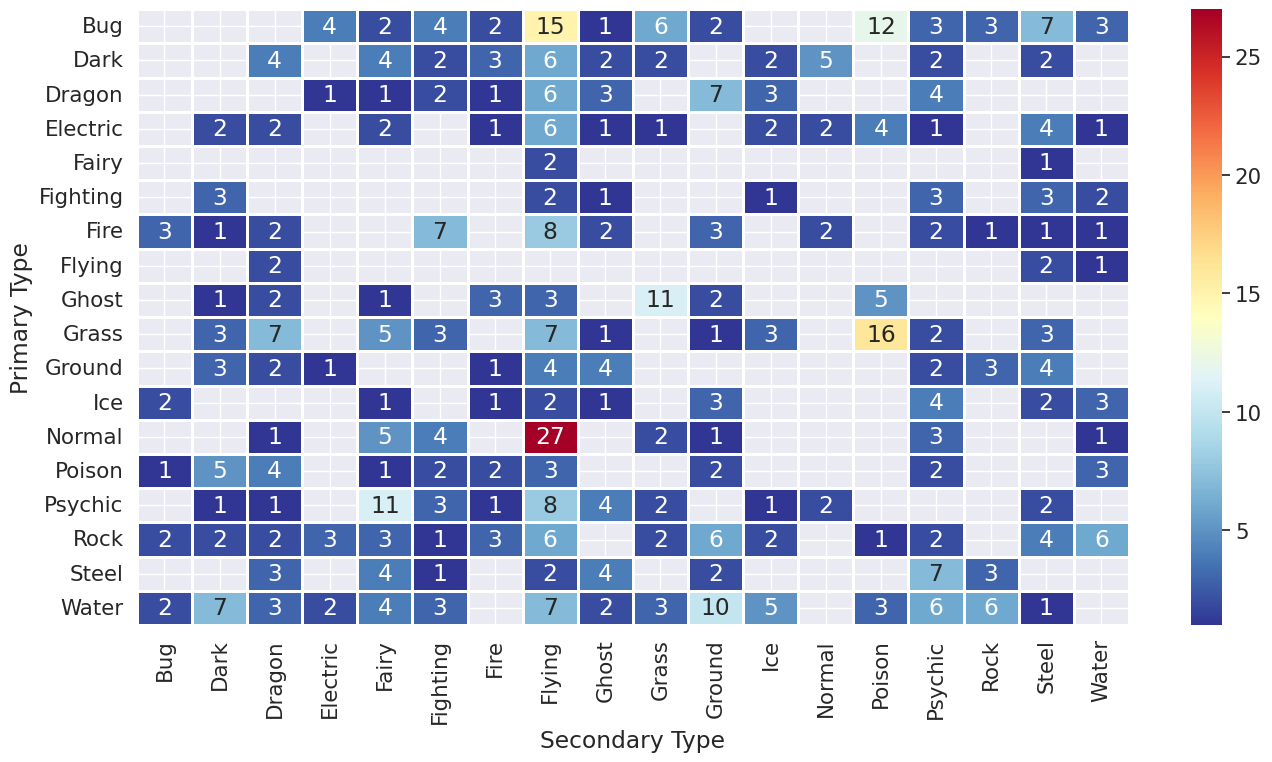

In [31]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.heatmap(
          dual_types.groupby(["primary_type", "secondary_type"]).size().unstack(),
          linewidths = 1,
          annot = True,
          cmap = "RdYlBu_r"
          ).set(xlabel ="Secondary Type", ylabel = "Primary Type")

This plot reveals that three most common combinations of primary and secondary type are in order:

1. `Normal`/ `Flying`-type
2. `Bug`/ `Flying`-type
3. `Grass`/ `Poison`-type

## Step 15: Strongest Dual Type by Median of Total

Let's find out what the strongest dual type combination is by their median of `total`.

In [32]:
medians = df.groupby(["primary_type", "secondary_type"]).median(numeric_only=True).loc[:, "total"]

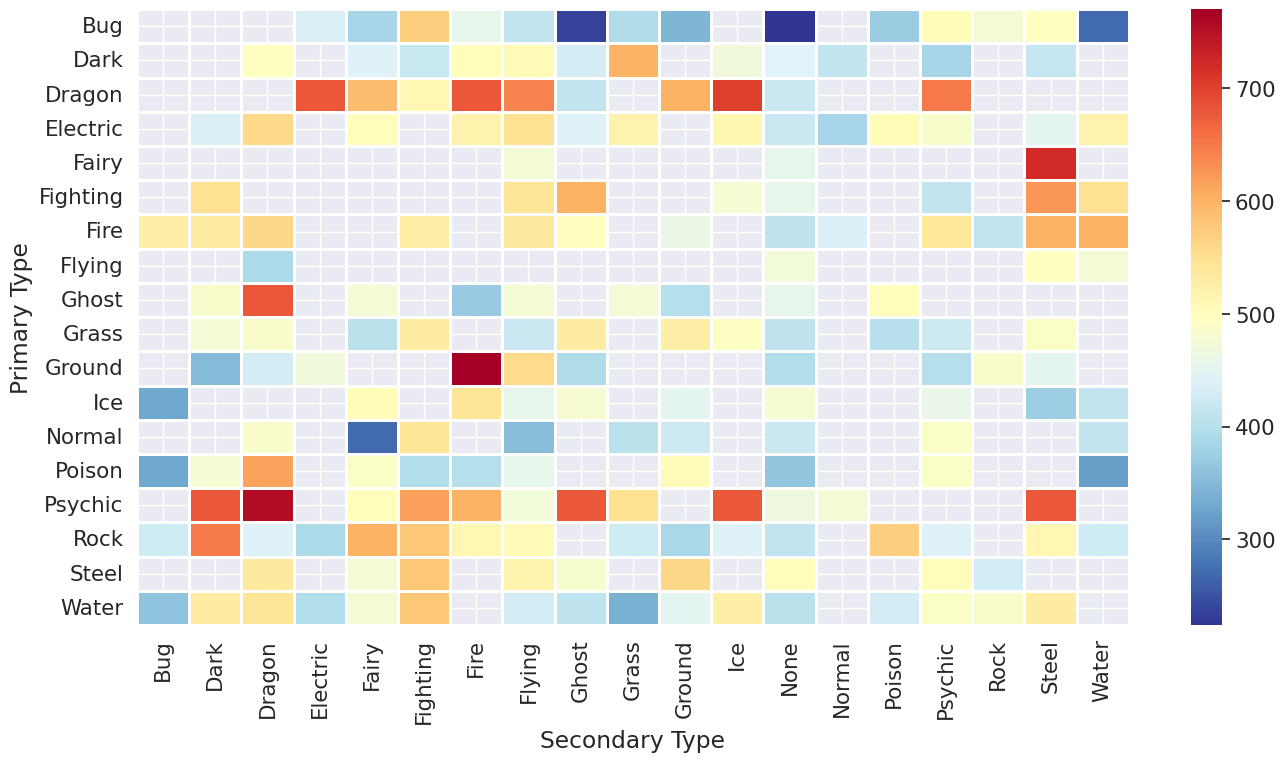

In [33]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.heatmap(
      medians.unstack(),
      linewidths=1,
      cmap="RdYlBu_r"
      ).set(xlabel ="Secondary Type", ylabel = "Primary Type")

We can see that the strongest dual type combination by median of total stats is `Ground`/ `Fire` followed by `Psychic`/ `Dragon`. Let's check which Pokemon have these typings.



In [34]:
df[(df["primary_type"] == 'Ground') & (df["secondary_type"] == 'Fire')]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
469,383,Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


In [35]:
df[(df["primary_type"] == 'Psychic') & (df["secondary_type"] == 'Dragon')]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
942,800,Ultra Necrozma,Psychic,Dragon,754,97,167,97,167,97,129,7,True


There are only one Pokemon for each type combination. That explains why these combinations have a higher median than other combinations which have a larger set of data. This shows one of the drawbacks of heat maps through concealing the number of Pokemon representing the combination.

## Step 16: Total Stat and Type Ratio

Let's plot the ratio between `primary_type` and `total`.

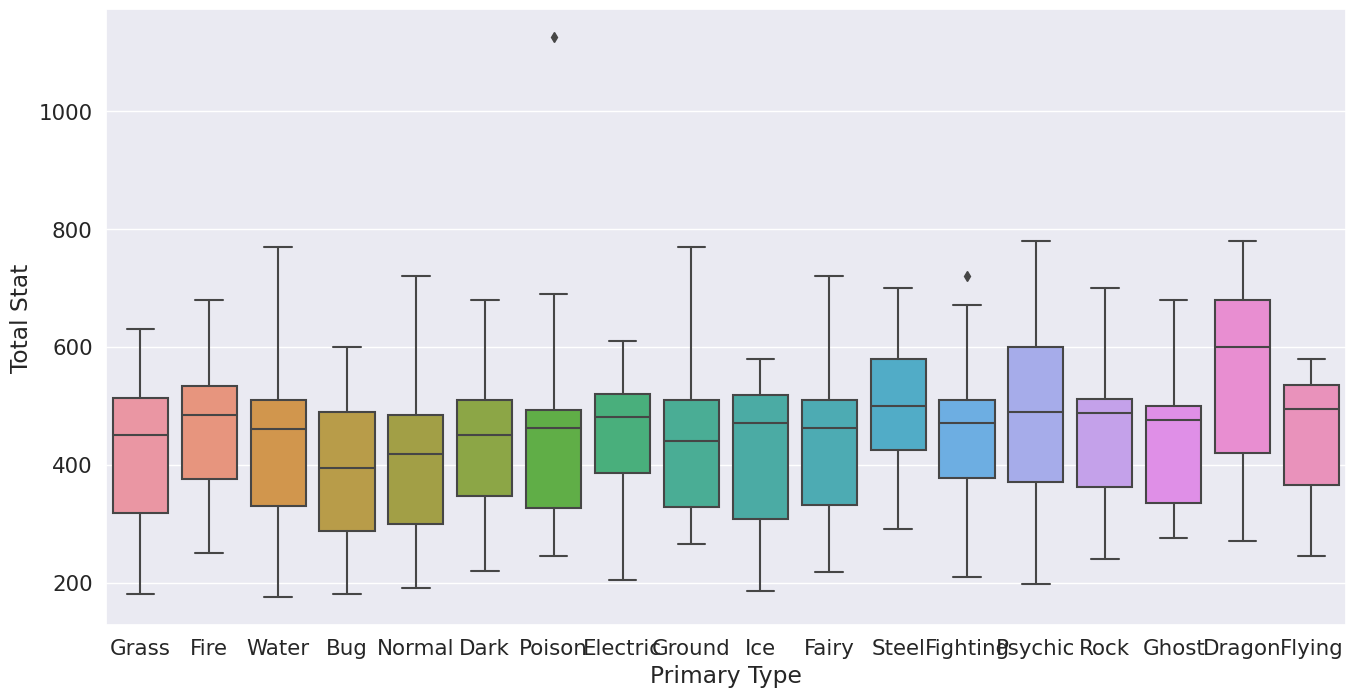

In [36]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.boxplot(
            data = df,
            x = "primary_type", 
            y = "total"
            ).set(xlabel ="Primary Type", ylabel = "Total Stat")

Let's also plot the ratio between `secondary_type`and `total`.

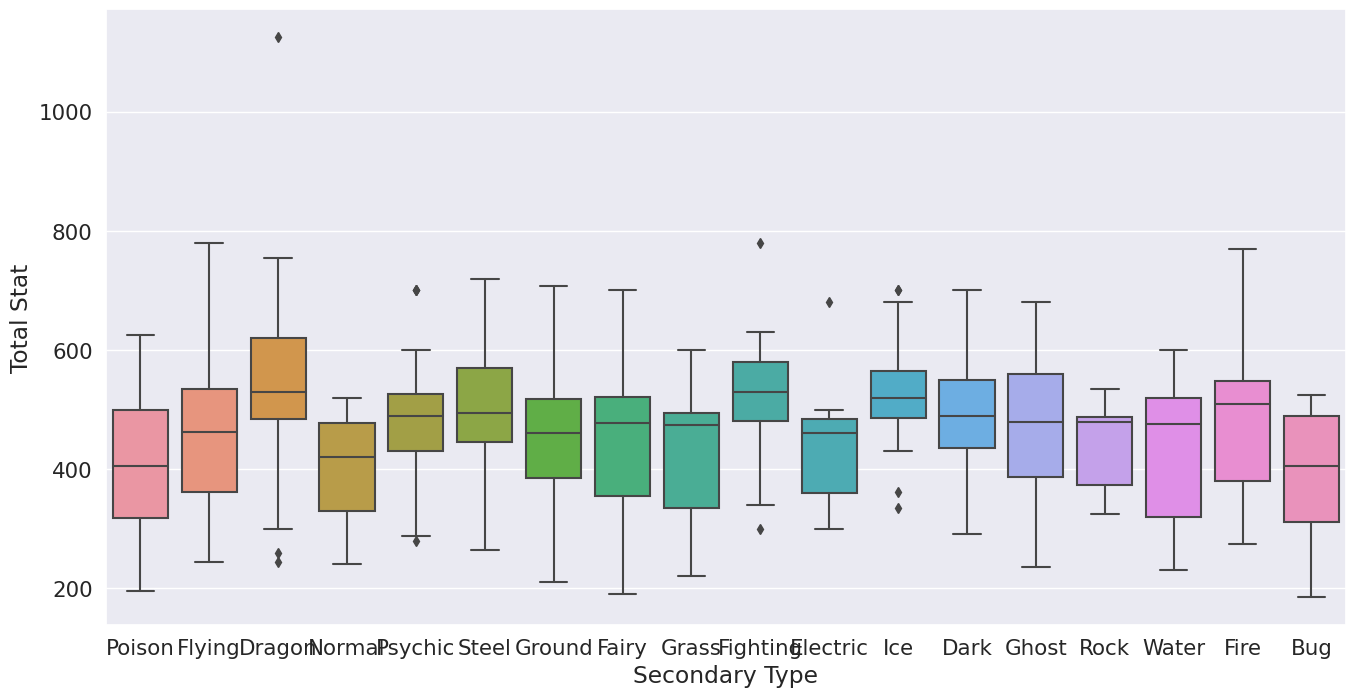

In [37]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.boxplot(
            data = df[df["secondary_type"] != "None"],
            x = "secondary_type", 
            y = "total"
            ).set(xlabel ="Secondary Type", ylabel = "Total Stat")

We can see that the strongest primary typing is `Psychic` followed closely by `Dragon`and the strongest secondary typing is `Flying` followed by `Fire`. But it hards to definetely say that there is a strongest type.


## Step 16: Columns Correlation

Let's find out the correlation between each column in the dataframe.

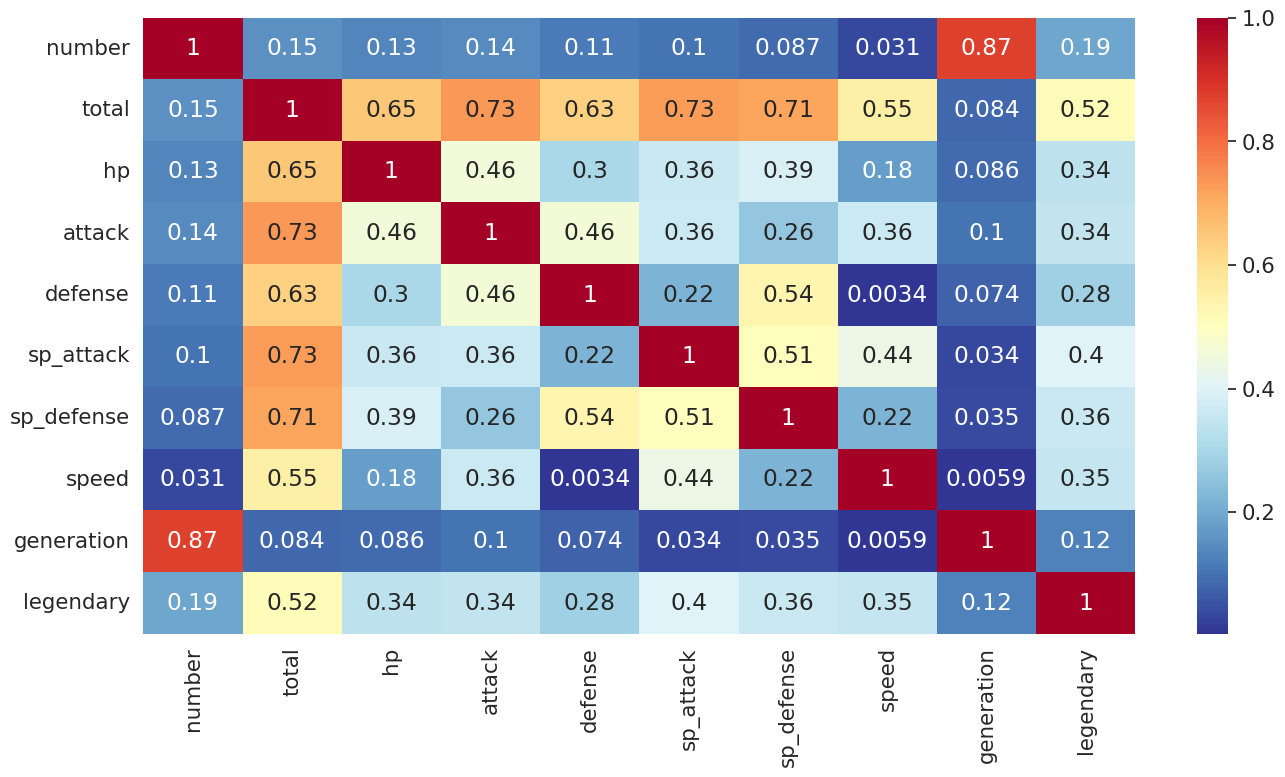

In [38]:
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.heatmap(
      df.corr(numeric_only=True), 
      annot=True, 
      cmap="RdYlBu_r"
      )

We can see that the highest correlation is between the `number` and `generation` column with 0.87 followed by `attack` and `sp_attack` in correlation with `total` with 0.73.

# Conclusion

After the exploratory data analysis into the dataset we have learned that:

- The most common types of Pokemon are `Water` followed by `Normal`. 

- The strongest Pokemon is `Eternamax Eternatus` with a `total` of 1125 and the weakest Pokemon is `Wishiwashi Solo Forme` with a `total`of 175.

- The most common generation is the first generation, while the strongest generation is the eighth generation by a minor margin.

- The most common single type is `Water` and the most common dual type is `Normal`/ `Flying`. 

- The strongest single type non-legendary Pokemon is `Slaking`.

- The strongest dual type combination by total stats is `Ground`/ `Fire`. 

- The strongest primary type of pokemon is `Psychic` by a small margin, while the strongest secondary type of pokemon is `Flying`.

- The highest correlation between the columns is between the `number` column and `generation` column with 0.87.

- Heat maps are a powerful tool to visualise data, but they have draw backs with hiding the number of samples in certain metrics.

These are the initial insights gained and there are certainly further points to dig into. But these are questions for another analysis on another day.